In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./real estate.csv")

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
df = df.rename(columns={"X1 transaction date": "transaction date",
                "X2 house age": "house age",
                "X3 distance to the nearest MRT station": "distance to the nearest MRT station",
                "X4 number of convenience stores": "number of convenience stores",
                "X5 latitude": "latitude",
                "X6 longitude": "longitude",
                "Y house price of unit area": "house price of unit area"})

In [6]:
df.head()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
df = df.drop(columns="No")

In [8]:
df.describe()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [9]:
df.isna().sum()

transaction date                       0
house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64

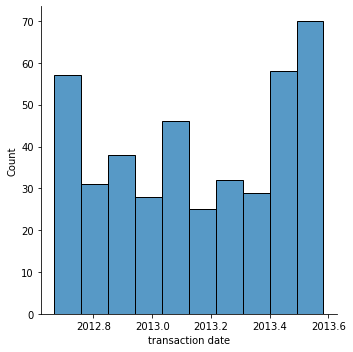

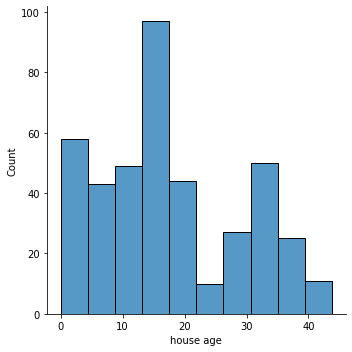

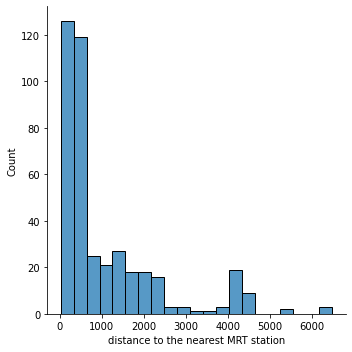

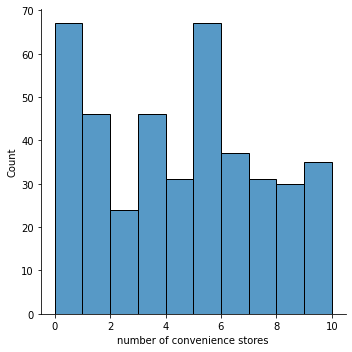

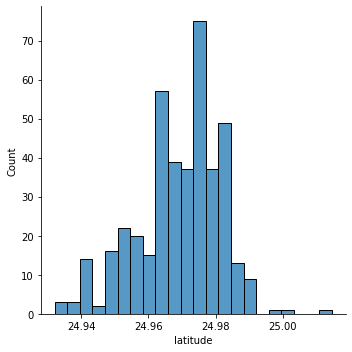

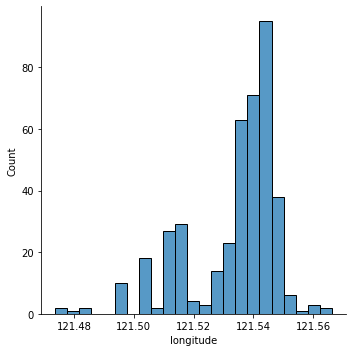

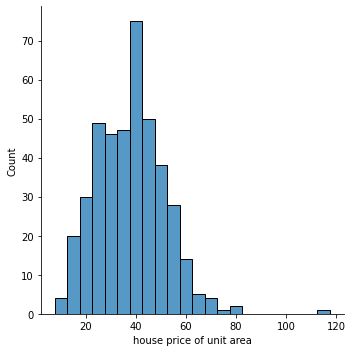

In [10]:
for col in df.columns:
    sns.displot(data=df, x=col)

<AxesSubplot:>

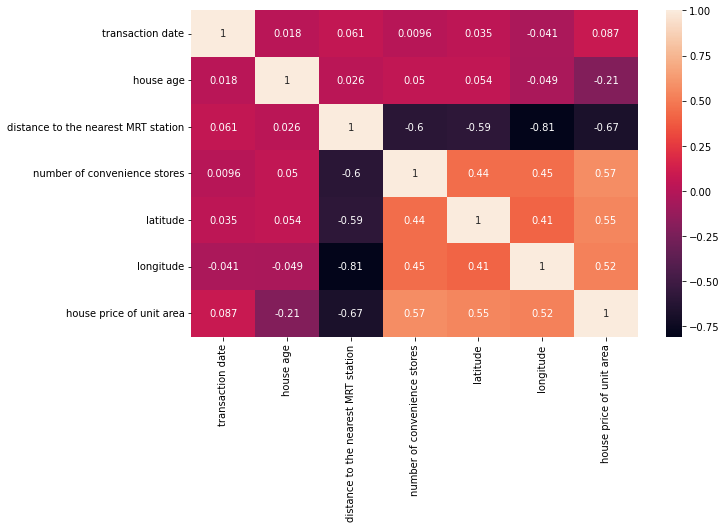

In [11]:
corr = df.corr()
f, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr, annot=True)

In [12]:
df = df.drop(columns="transaction date")

In [13]:
df.head()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [14]:
label = "house price of unit area"
features = df.drop(columns=label).columns

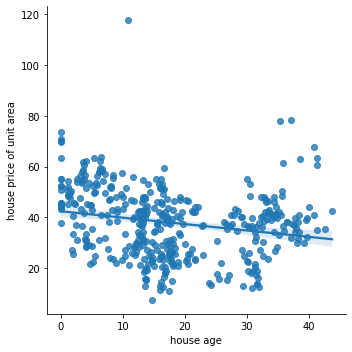

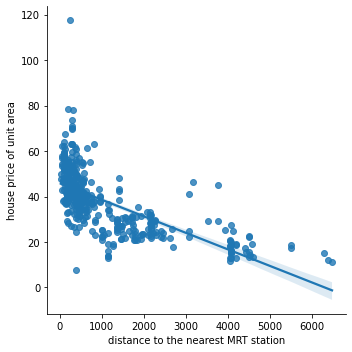

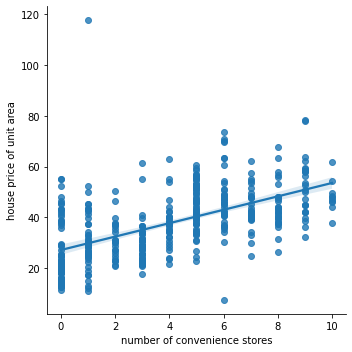

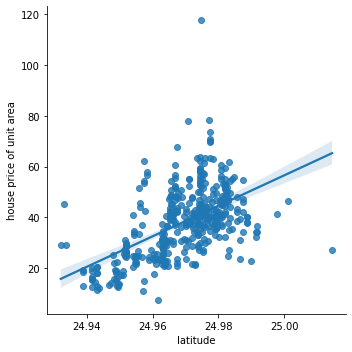

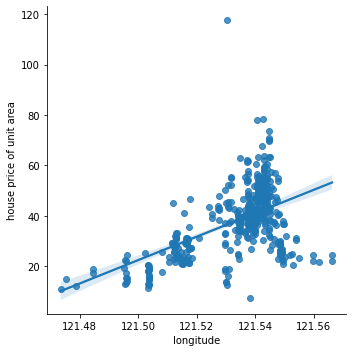

In [15]:
for col in features:
    sns.lmplot(data=df, x=col, y=label)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaled_data = StandardScaler().fit_transform(df)

In [18]:
df = pd.DataFrame(scaled_data, columns=df.columns)

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [20]:
x, y = df[features], df[label]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [22]:
x_train.shape

(289, 5)

In [23]:
x_test.shape

(125, 5)

In [24]:
rf_model = RandomForestRegressor().fit(x_train, y_train)

In [25]:
rf_predictions = rf_model.predict(x_test)

In [26]:
from sklearn.metrics import r2_score

In [27]:
def show_metrics(predictions):
    print("R2: ", r2_score(y_test, predictions))

In [28]:
show_metrics(rf_predictions)

R2:  0.7560924925848054


In [29]:
gb_model = GradientBoostingRegressor().fit(x_train, y_train)

In [30]:
gb_predictions = gb_model.predict(x_test)

In [31]:
show_metrics(gb_predictions)

R2:  0.7153299562297131


In [32]:
svr_model = SVR().fit(x_train, y_train)

In [33]:
svr_predictions = svr_model.predict(x_test)

In [34]:
show_metrics(svr_predictions)

R2:  0.7153706526386872


In [35]:
knn_model = KNeighborsRegressor().fit(x_train, y_train)

In [36]:
knn_predictions = knn_model.predict(x_test)

In [37]:
show_metrics(knn_predictions)

R2:  0.6844773259195782


In [38]:
ada_model = AdaBoostRegressor().fit(x_train, y_train)

In [39]:
ada_predictions = ada_model.predict(x_test)

In [40]:
show_metrics(ada_predictions)

R2:  0.6550215574158017


In [46]:
rf_hyperparameters = {"n_estimators": [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
                     "max_features": ["auto", "sqrt"],
                     "max_depth": [int(x) for x in np.linspace(10, 110, num = 11)],
                     "min_samples_split": [2, 5, 10],
                     "bootstrap": [True, False]}

In [47]:
model = GridSearchCV(RandomForestRegressor(), rf_hyperparameters, cv=3, verbose=3).fit(x_train, y_train)

Fitting 3 folds for each of 1320 candidates, totalling 3960 fits
[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=200;, score=0.680 total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=200;, score=0.531 total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=200;, score=0.719 total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=400;, score=0.677 total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=400;, score=0.512 total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=400;, score=0.714 total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=600;, score=0.683 total time=   0.7s
[CV 

In [48]:
predictions = model.predict(x_test)

In [49]:
show_metrics(predictions)

R2:  0.7636303824109835


In [50]:
import joblib

In [51]:
filename = "model.pkl"

In [54]:
joblib.dump(model, filename)

['model.pkl']

In [56]:
model.best_params_

{'bootstrap': True,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 200}

In [78]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

In [79]:
lr_model = LinearRegression().fit(x_train, y_train)

In [80]:
lr_predictions = lr_model.predict(x_test)

In [81]:
show_metrics(lr_predictions)

R2:  0.6295841937494842


In [82]:
lasso_model = LassoCV().fit(x_train, y_train)

In [84]:
lasso_predictions = lasso_model.predict(x_test)

In [85]:
show_metrics(lasso_predictions)

R2:  0.6300573885433467


In [86]:
ridge_model = RidgeCV().fit(x_train, y_train)

In [87]:
ridge_predictions = ridge_model.predict(x_test)

In [88]:
show_metrics(ridge_predictions)

R2:  0.6317843260465323


In [89]:
elastic_model = ElasticNetCV().fit(x_train, y_train)

In [90]:
elastic_predictions = elastic_model.predict(x_test)

In [91]:
show_metrics(elastic_predictions)

R2:  0.6283747187981146


In [92]:
original_df = pd.read_csv("real estate.csv")

In [93]:
original_df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [125]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [149]:
original_df = pd.read_csv("real estate.csv")

In [150]:
original_df = original_df.drop(columns="No")

In [151]:
new_label = "Y house price of unit area"
x, y = original_df[original_df.drop(columns=new_label).columns].values, original_df[new_label].values

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [155]:
transformer = ColumnTransformer([("scaler", StandardScaler(), [0, 1, 2, 3, 4, 5])])

In [162]:
pipe = Pipeline([("transformer", transformer), ("model", RandomForestRegressor(max_depth=60, max_features="sqrt", min_samples_split=2, n_estimators=200))]).fit(x_train, y_train)

In [163]:
predictions = pipe.predict(x_test)

In [164]:
show_metrics(predictions)

R2:  0.7826151428716315
